In [1]:
from sklearn import datasets

iris = datasets.load_iris()

## Load the iris dataset

In [2]:
# Print the label species
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Create a dataframe

In [7]:
# Create a DataFrame of given iris dataset

import pandas as pd
data = pd.DataFrame({
    'sepal length': iris.data[:,0],
    'sepal width': iris.data[:,1],
    'petal length': iris.data[:,2],
    'petal width': iris.data[:,3],
    'species': iris.target
})

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Split the data into train and test sets

In [10]:
from sklearn.model_selection import train_test_split

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Train the random forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create the classifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True)

# Train the model
clf.fit(X_train, y_train)

# Get the predictions
y_pred = clf.predict(X_test)

In [20]:
from sklearn import metrics

print("Accuracy: {}%".format(round(metrics.accuracy_score(y_test, y_pred) *100, 2)))

Accuracy: 95.56%


## Finding important features

In [22]:
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.471749
petal length (cm)    0.387336
sepal length (cm)    0.110741
sepal width (cm)     0.030174
dtype: float64

## Visualizing important features

No handles with labels found to put in legend.


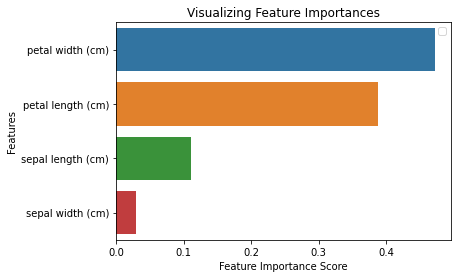

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Feature Importances')
plt.legend()
plt.show()

## Generating the model on selected features

In [26]:
X = data[['petal length', 'petal width', 'sepal length']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: {}%".format(round(metrics.accuracy_score(y_test, y_pred) *100, 2)))

Accuracy: 95.56%
